<a href="https://colab.research.google.com/github/sunnyyashu178/DataScience-Projects/blob/master/regularization_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression (l2 Norm)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [35]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
df = pd.DataFrame()
df["X"] = X.reshape(100,)
df["y"] = y
df.head()

,X,y
0,-1.721949,2.778672
1,2.518715,6.514691
2,1.092586,4.374246
3,0.843404,2.313683
4,2.617245,8.529298


In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.06602214]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


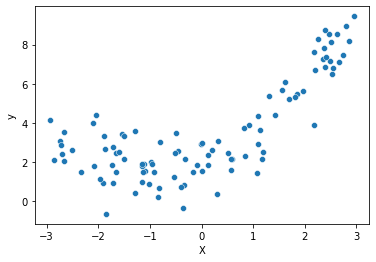

In [38]:
sns.scatterplot("X","y",data=df)

In [39]:
from sklearn.linear_model import SGDRegressor

In [40]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.04075735])

# Lasso Regression (l1 norm)

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.02138086])

# Elastic Net

In [43]:
from sklearn.linear_model import ElasticNet

In [47]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.02093219])

# Early Stopping

In [48]:
from sklearn.base import clone

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2) 

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)

In [55]:
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

In [56]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_val_poly_scaled = std_scaler.transform(X_val_poly)

In [60]:
sgd_reg = SGDRegressor(warm_start=True,penalty=None,
                              learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict,y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [61]:
minimum_val_error

0.8686914224170534

In [62]:
best_epoch

5

In [63]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=True)